In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

### Concurrent Activity Signals 

In [2]:
df = pd.read_csv('exam_sessions.csv')
df

,user_id,exam_session_id,started_at,finished_at,score,status
0,97e1a644-ae6d-4e3a-844a-a6f82bab289d,00000ef9-a6a2-43c0-bf18-79bd17f2713e,2025-06-07 15:33:15,2025-06-07 15:40:10,0.875000,finished
1,3151d630-677a-4a38-bb76-65ad67f1a78c,000037d7-4dbc-449b-bcbf-a144dca33bd4,2025-07-24 04:36:36,NaN,NaN,started
2,7455f8ea-84ff-4793-97d5-83895d19c0b1,000041ce-325e-4bd4-9f90-7b55f9770e94,2025-10-07 17:24:19,2025-10-07 17:31:07,0.550000,finished
3,4dc30e4b-68aa-424a-9afb-69b5c6c13432,0000613f-453a-491b-a066-e8eda117291e,2025-03-30 19:45:17,2025-03-30 20:06:41,0.160000,finished
4,91390b89-fbf6-4ec0-82a5-cab9df7965e0,000085f4-2fd8-4b30-bd1b-bf53ba7b2fe1,2025-02-07 20:26:24,2025-02-07 20:32:47,1.000000,finished
...,...,...,...,...,...,...
386915,76402602-a0df-420a-b0e1-086d9b942778,fffecc9b-a1ee-49cd-a135-e52754a578e8,2025-12-19 01:26:53,2025-12-19 01:34:31,0.750000,finished
386916,3235afa7-9d51-4716-833f-9870dec05333,fffeeb11-7ba1-4667-8b03-4d95c16648b1,2025-12-05 04:38:35,2025-12-05 04:46:32,0.800000,finished
386917,1bd21bf1-b00e-49e3-b2c2-e0fb524c79ac,ffff471a-0b06-4d15-8c6f-1a23f0c1e33c,2025-11-17 19:29:59,2025-11-17 20:05:18,0.506667,discarded
386918,ea22bc5b-f281-44eb-89b9-a884cd2a1ea4,ffff6333-6091-49fe-9485-727aee2de03f,2025-11-01 18:08:50,2025-11-01 19:53:21,0.586667,finished


In [3]:
temp_cols = [f'col_{i}' for i in range(10)]
activity_df = pd.read_csv('content_activity.csv', names=temp_cols, header=None,
                     skiprows=1, index_col=False, on_bad_lines='skip', engine='python')
activity_df = activity_df.drop(activity_df.columns[5:10], axis = 1)
activity_df.columns = ['user_id', 'activity_timestamp', 'ip_address', 'user_agent', 'extra']
activity_df

,user_id,activity_timestamp,ip_address,user_agent,extra
0,fb65cf6f-bb87-4165-8397-f97353971bad,2025-11-08 22:18:47,24.12.79.10|10.3.2.78,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,like Gecko) Chrome/141.0.0.0 Safari/537.36
1,95b27553-ded6-46b8-a030-d2a8ded1c499,2025-08-29 20:04:49,23.234.103.241|10.3.2.45,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,like Gecko) Version/18.6 Safari/605.1.15
2,c1c27c21-b61c-4051-9144-a9738477ba7f,2025-06-17 04:13:19,69.112.167.87|10.3.3.158,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,like Gecko) Chrome/136.0.0.0 Safari/537.36 Ed...
3,54136626-f7f5-41e1-bbd4-3d2f971814c4,2025-05-30 23:20:10,76.34.105.150|10.3.2.140,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,like Gecko) Chrome/137.0.0.0 Safari/537.36
4,826d9a5a-4d06-4bc9-b1fa-4722965ce300,2025-09-11 05:50:53,72.89.26.28|10.3.2.16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,like Gecko) Chrome/139.0.0.0 Safari/537.36
...,...,...,...,...,...
1350959,eb3267c1-1010-47af-9206-6a01de2cb9d9,2025-07-22 15:41:29,139.68.242.202|10.3.3.158,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,like Gecko) Chrome/138.0.0.0 Safari/537.36
1350960,507120e7-fadf-4e21-bd52-bff21f5de514,2025-04-24 19:12:39,184.191.16.215|10.3.3.94,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,like Gecko) Version/18.4 Safari/605.1.15
1350961,f347126c-0d33-4f23-b024-a580fd4d6c9c,2025-12-11 15:37:56,23.114.54.73|10.3.2.202,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,like Gecko) Version/17.6 Safari/605.1.15
1350962,a381c2df-4c7c-422d-a19b-ec1862fba183,2025-04-23 04:17:34,107.1.95.163|10.3.2.4,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,like Gecko) Chrome/135.0.0.0 Safari/537.36 Ed...


In [4]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['finished_at'] = pd.to_datetime(df['finished_at'])

In [5]:
df_finished = df[df['status'] == 'finished'].copy()
df_finished = df_finished.sort_values(['user_id', 'started_at'])
df_finished = df_finished.sort_values(['user_id', 'started_at'])

In [6]:
overlap_records = []

for user, group in df_finished.groupby('user_id'):
    n = len(group)
    if n <= 1:
        continue

    starts = group['started_at'].values.astype('datetime64[ns]')
    ends = group['finished_at'].values.astype('datetime64[ns]')
    session_ids = group['exam_session_id'].values

    # Create a broadcasted comparison: later_starts < current_ends
    start_matrix = np.broadcast_to(starts, (n, n))
    end_matrix = np.broadcast_to(ends, (n, n)).T

    overlap_mask = (start_matrix < end_matrix) & (np.triu(np.ones((n, n), dtype=bool), k=1))

    # Extract overlapping pairs
    idx_i, idx_j = np.where(overlap_mask)
    for i, j in zip(idx_i, idx_j):
        overlap_records.append({
            'user_id': user,
            'session1': session_ids[i],
            'session2': session_ids[j],
            'start1': starts[i],
            'end1': ends[i],
            'start2': starts[j],
            'end2': ends[j]
        })

overlap_df = pd.DataFrame(overlap_records)
overlap_df

,user_id,session1,session2,start1,end1,start2,end2
0,003afb9c-ade5-4ebe-8e74-cc16c4f98b7b,21160acb-d21f-42d5-848e-c1c2a1d8bd8f,69aa6089-f9ea-4b13-8f84-7df19c811748,2025-04-24 12:04:06,2025-04-24 19:23:30,2025-04-24 18:58:59,2025-04-24 19:12:38
1,003b1aa9-ee23-4874-b957-4deb63b6eeb7,c15248b4-b683-4b2c-92ef-52ca17edbf42,ab8ac2e9-a814-426a-b38f-a47623daa34c,2025-02-24 01:52:49,2025-02-24 01:58:40,2025-02-24 01:53:03,2025-02-24 01:57:27
2,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,ed59c640-5e1a-417b-9c16-58f80e193dfd,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-12 22:50:17,2025-07-12 23:19:34
3,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,689af6ad-930d-464c-9e97-b2708f6b3c2b,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:23:30,2025-07-13 00:50:58
4,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,a1326dc9-7a82-4018-a83b-5639f8cb94b3,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:51:41,2025-07-13 01:07:39
...,...,...,...,...,...,...,...
63283,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,14ba4e7c-7a5e-431b-b48f-199b692e53e1,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:06:22,2025-11-15 13:29:21
63284,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,ddb3ab56-bd04-4bf7-917e-ce03cab84274,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:30:28,2025-11-15 13:37:20
63285,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,0ed27780-8948-4982-9c4b-09b8de0e3aca,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:42:16,2025-11-15 14:37:11
63286,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,4f47bd3c-9c70-4ee4-b9b0-5811d10c3005,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 16:39:30,2025-11-15 17:29:22


In [7]:
overlap_df['user_id'].nunique()

3068

In [8]:
# Finds overlapping tests started within 10m of each other
overlap_df['start_diff_min'] = (
    (overlap_df['start2'] - overlap_df['start1'])
    .dt.total_seconds() / 60
).abs()

overlap_df['start_within_10m'] = overlap_df['start_diff_min'] <= 10
overlap_df

,user_id,session1,session2,start1,end1,start2,end2,start_diff_min,start_within_10m
0,003afb9c-ade5-4ebe-8e74-cc16c4f98b7b,21160acb-d21f-42d5-848e-c1c2a1d8bd8f,69aa6089-f9ea-4b13-8f84-7df19c811748,2025-04-24 12:04:06,2025-04-24 19:23:30,2025-04-24 18:58:59,2025-04-24 19:12:38,414.883333,False
1,003b1aa9-ee23-4874-b957-4deb63b6eeb7,c15248b4-b683-4b2c-92ef-52ca17edbf42,ab8ac2e9-a814-426a-b38f-a47623daa34c,2025-02-24 01:52:49,2025-02-24 01:58:40,2025-02-24 01:53:03,2025-02-24 01:57:27,0.233333,True
2,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,ed59c640-5e1a-417b-9c16-58f80e193dfd,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-12 22:50:17,2025-07-12 23:19:34,0.250000,True
3,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,689af6ad-930d-464c-9e97-b2708f6b3c2b,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:23:30,2025-07-13 00:50:58,93.466667,False
4,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,a1326dc9-7a82-4018-a83b-5639f8cb94b3,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:51:41,2025-07-13 01:07:39,121.650000,False
...,...,...,...,...,...,...,...,...,...
63283,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,14ba4e7c-7a5e-431b-b48f-199b692e53e1,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:06:22,2025-11-15 13:29:21,15961.316667,False
63284,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,ddb3ab56-bd04-4bf7-917e-ce03cab84274,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:30:28,2025-11-15 13:37:20,15985.416667,False
63285,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,0ed27780-8948-4982-9c4b-09b8de0e3aca,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:42:16,2025-11-15 14:37:11,15997.216667,False
63286,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,4f47bd3c-9c70-4ee4-b9b0-5811d10c3005,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 16:39:30,2025-11-15 17:29:22,16174.450000,False


In [9]:
# Merges individual test sessions with activity timestamps from content_activity
activity_df['activity_timestamp'] = pd.to_datetime(activity_df['activity_timestamp'])

activity_sessions = activity_df.merge(
    df_finished[['user_id','exam_session_id','started_at','finished_at']],
    on='user_id',
    how='inner'
)

activity_sessions = activity_sessions[
    (activity_sessions['activity_timestamp'] >= activity_sessions['started_at']) &
    (activity_sessions['activity_timestamp'] <= activity_sessions['finished_at'])
]

In [10]:
# Finds number of unique IP addresses & devices per each test session
session_features = activity_sessions.groupby(
    ['user_id','exam_session_id']
).agg(
    session_ips=('ip_address','nunique'),
    session_devices=('user_agent','nunique')
).reset_index()

In [11]:
overlap_df = overlap_df.merge(
    session_features,
    left_on=['user_id','session1'],
    right_on=['user_id','exam_session_id'],
    how='left'
).rename(columns={
    'session_ips':'ips_session1',
    'session_devices':'devices_session1'
}).drop(columns='exam_session_id')

overlap_df = overlap_df.merge(
    session_features,
    left_on=['user_id','session2'],
    right_on=['user_id','exam_session_id'],
    how='left'
).rename(columns={
    'session_ips':'ips_session2',
    'session_devices':'devices_session2'
}).drop(columns='exam_session_id')

In [12]:
overlap_df['different_device_pattern'] = (
    (overlap_df['devices_session1'] > 1) |
    (overlap_df['devices_session2'] > 1)
)
overlap_df[overlap_df['different_device_pattern'] == True]

,user_id,session1,session2,start1,end1,start2,end2,start_diff_min,start_within_10m,ips_session1,devices_session1,ips_session2,devices_session2,different_device_pattern
35,0061be68-8f96-49d4-8dd2-dbb11ecedc3b,4a3de3a0-612a-4652-89b7-7d8059ca045e,4f06085d-28bb-4a09-a2aa-28f3a45deb77,2025-05-12 12:55:02,2025-05-28 01:56:45,2025-05-12 12:55:36,2025-05-28 02:09:49,0.566667,True,5.0,2.0,5.0,2.0,True
57,00fb8218-c6e2-43dc-8221-d8ea52239e4f,d812b784-e8fe-4fac-998c-6e1557c09036,76eb4acc-b33f-4417-b8ff-1183c67bd43f,2025-06-20 23:29:20,2025-08-12 14:39:32,2025-06-20 23:33:20,2025-06-20 23:44:59,4.000000,True,15.0,2.0,NaN,NaN,True
58,00fb8218-c6e2-43dc-8221-d8ea52239e4f,d812b784-e8fe-4fac-998c-6e1557c09036,1222f2db-0681-4c10-a802-868c72f9a8cb,2025-06-20 23:29:20,2025-08-12 14:39:32,2025-06-24 16:23:33,2025-06-24 16:32:16,5334.216667,False,15.0,2.0,NaN,NaN,True
59,00fb8218-c6e2-43dc-8221-d8ea52239e4f,d812b784-e8fe-4fac-998c-6e1557c09036,c9f671e3-5712-40e7-b62a-be326e732f2b,2025-06-20 23:29:20,2025-08-12 14:39:32,2025-06-27 19:59:17,2025-06-27 20:12:46,9869.950000,False,15.0,2.0,NaN,NaN,True
60,00fb8218-c6e2-43dc-8221-d8ea52239e4f,d812b784-e8fe-4fac-998c-6e1557c09036,0260ce66-b16c-4832-a49f-42e1e1d65b11,2025-06-20 23:29:20,2025-08-12 14:39:32,2025-07-15 15:18:13,2025-07-15 15:30:27,35508.883333,False,15.0,2.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63263,ffa05993-8fb4-48a8-88f8-8c9e0fec5571,3552f4f4-5737-4d79-b837-b56fb3a08f22,2dda4aab-f428-4bcc-b10b-94667d83b2ed,2025-05-25 13:59:10,2025-05-29 13:40:45,2025-05-29 01:59:31,2025-05-29 02:08:25,5040.350000,False,3.0,2.0,NaN,NaN,True
63264,ffa05993-8fb4-48a8-88f8-8c9e0fec5571,3552f4f4-5737-4d79-b837-b56fb3a08f22,67ccf61d-1c0a-4de0-997f-6edbda615b18,2025-05-25 13:59:10,2025-05-29 13:40:45,2025-05-29 12:52:47,2025-05-29 13:14:04,5693.616667,False,3.0,2.0,NaN,NaN,True
63265,ffa05993-8fb4-48a8-88f8-8c9e0fec5571,4b096a6c-ede7-4e2e-a5cc-df4d3bf3f22f,2dda4aab-f428-4bcc-b10b-94667d83b2ed,2025-05-25 16:27:07,2025-05-30 01:39:12,2025-05-29 01:59:31,2025-05-29 02:08:25,4892.400000,False,4.0,2.0,NaN,NaN,True
63266,ffa05993-8fb4-48a8-88f8-8c9e0fec5571,4b096a6c-ede7-4e2e-a5cc-df4d3bf3f22f,67ccf61d-1c0a-4de0-997f-6edbda615b18,2025-05-25 16:27:07,2025-05-30 01:39:12,2025-05-29 12:52:47,2025-05-29 13:14:04,5545.666667,False,4.0,2.0,NaN,NaN,True


does test progress save? (e.g. stop and go back to it later?)

In [14]:
flagged_accounts = overlap_df[overlap_df['different_device_pattern'] == True]
flagged_accounts = flagged_accounts[flagged_accounts['start_within_10m'] == True]
flagged_accounts

,user_id,session1,session2,start1,end1,start2,end2,start_diff_min,start_within_10m,ips_session1,devices_session1,ips_session2,devices_session2,different_device_pattern
35,0061be68-8f96-49d4-8dd2-dbb11ecedc3b,4a3de3a0-612a-4652-89b7-7d8059ca045e,4f06085d-28bb-4a09-a2aa-28f3a45deb77,2025-05-12 12:55:02,2025-05-28 01:56:45,2025-05-12 12:55:36,2025-05-28 02:09:49,0.566667,True,5.0,2.0,5.0,2.0,True
57,00fb8218-c6e2-43dc-8221-d8ea52239e4f,d812b784-e8fe-4fac-998c-6e1557c09036,76eb4acc-b33f-4417-b8ff-1183c67bd43f,2025-06-20 23:29:20,2025-08-12 14:39:32,2025-06-20 23:33:20,2025-06-20 23:44:59,4.000000,True,15.0,2.0,NaN,NaN,True
133,014548ef-8abe-4d70-91f6-210e133cabf2,ca73ec77-d0f0-4204-8f6d-65f403b4eb9a,bee6baf1-55b6-4076-b7dd-6627066d9522,2025-03-10 02:58:24,2025-06-25 03:17:45,2025-03-10 03:01:09,2025-03-10 04:10:59,2.750000,True,6.0,2.0,NaN,NaN,True
278,01d32f89-16bf-4368-ab4f-090af888da9d,de3b2eb2-e4ad-4478-99a0-75502e82a6d4,9c872bc4-e0d7-4705-9c3d-9ea330a98a85,2025-05-23 11:56:59,2025-06-06 00:26:03,2025-05-23 11:57:16,2025-05-23 12:15:37,0.283333,True,9.0,3.0,NaN,NaN,True
309,01d32f89-16bf-4368-ab4f-090af888da9d,982837da-c48f-4358-866b-b65722bca3da,07928b48-061d-4f3c-8ebd-e664b67d420c,2025-05-31 18:25:47,2025-06-07 21:18:37,2025-05-31 18:26:02,2025-05-31 18:49:45,0.250000,True,5.0,2.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61650,fb8c36cb-19d6-4525-aad4-c9a9b714bca0,b3e1a88f-a9c7-4088-b575-3f449e2d1b86,46114ec7-46bb-4f0a-9ab6-eb13950903d5,2025-09-29 02:15:13,2025-12-18 13:03:55,2025-09-29 02:22:26,2025-09-29 02:25:44,7.216667,True,28.0,3.0,NaN,NaN,True
62097,fc1e19fc-a131-4662-9a1c-2f4830d8acba,ab85d37a-5f56-40aa-aa36-fa357a6cf798,992401b5-cd4c-4b7f-b4fe-edc2c02fe336,2025-05-31 01:07:53,2025-06-10 05:02:55,2025-05-31 01:09:47,2025-05-31 01:24:57,1.900000,True,5.0,2.0,NaN,NaN,True
62206,fce08184-bb9f-426f-9310-0069af700719,851231f4-63d3-40a3-b91a-20a3183fc89c,c90a5fa6-c5d4-43df-87d0-616a0c15295e,2025-03-18 16:34:29,2025-05-03 15:29:15,2025-03-18 16:37:44,2025-05-01 20:26:39,3.250000,True,18.0,2.0,18.0,2.0,True
62513,fdd10189-6b21-4e64-a3bf-3a16432daba3,1a7e4cb9-b944-4740-bb50-9a156799f782,e7664225-62bf-4c2d-ab43-a339b90d93d5,2025-04-23 17:18:12,2025-06-01 03:51:30,2025-04-23 17:18:39,2025-04-23 17:38:05,0.450000,True,30.0,4.0,NaN,NaN,True


In [27]:
flagged_accounts['user_id'].nunique()

195

In [ ]:
flagged_accounts['user_id'].drop_duplicates().to_csv('concurrent_activity_flagged.csv', index=False)

### Device-Based Signals

In [32]:
activity_df = activity_df.sort_values(['user_id','activity_timestamp'])

activity_df['new_device'] = ~activity_df.duplicated(['user_id','user_agent'])

turnover = activity_df.groupby('user_id').agg(
    new_devices=('new_device','sum'),
    first_seen=('activity_timestamp','min'),
    last_seen=('activity_timestamp','max')
)

turnover['days_active'] = (turnover['last_seen'] - turnover['first_seen']).dt.days + 1
turnover['device_turnover_rate'] = turnover['new_devices'] / turnover['days_active']
turnover

,new_devices,first_seen,last_seen,days_active,device_turnover_rate
user_id,,,,,
0002211b-6e0c-4bd2-96b9-33c200b9efc4,2,2025-04-10 18:21:58,2025-04-30 00:15:23,20,0.100000
0006d178-29aa-4668-bcb5-efefd319f056,2,2025-06-11 21:26:17,2026-01-24 01:00:48,227,0.008811
00083cfe-429c-4d7e-8f59-3b0ceee503e8,1,2025-04-10 19:47:04,2025-04-11 18:07:45,1,1.000000
000aee50-8ff0-4f5e-a15c-98dcbcdf52b9,3,2025-11-01 11:49:35,2025-12-27 16:47:19,57,0.052632
00111df2-3d9a-47c3-a3b8-dae3a61369fe,1,2025-06-27 00:14:01,2025-07-12 07:15:51,16,0.062500
...,...,...,...,...,...
ffd7dbe4-2acb-4947-9e33-cec1e39ff287,3,2025-05-21 21:30:45,2025-06-07 02:52:17,17,0.176471
ffdec065-0f02-4b65-a963-a92971d695fc,1,2025-05-31 18:42:20,2025-05-31 18:42:20,1,1.000000
ffdee552-61ab-4e49-9b55-388bb466b601,1,2025-06-03 19:17:51,2026-01-15 21:38:07,227,0.004405


In [36]:
test = turnover[turnover['device_turnover_rate'] >= 0.3]
test = test[test['new_devices'] > 3]
test

,new_devices,first_seen,last_seen,days_active,device_turnover_rate
user_id,,,,,
1a0fc18a-834a-4a66-8db5-d7bc2fd73c4f,4,2025-08-02 15:57:39,2025-08-10 20:40:57,9,0.444444
243c3f87-f5ed-48ec-8c88-38ae047691e8,5,2025-12-20 05:30:43,2025-12-24 15:26:14,5,1.000000
32b71110-8d25-46be-b2dd-6f488d5c8fb6,4,2025-04-21 20:30:13,2025-04-28 00:51:22,7,0.571429
6c6136f4-e828-4c51-a987-4b3ca4bd57a7,4,2025-09-07 21:29:59,2025-09-17 22:32:38,11,0.363636
7dcc7c84-2516-49ea-bf25-da21a24b1b28,4,2025-05-29 14:10:11,2025-06-03 15:33:43,6,0.666667
7e3b901f-a669-4c12-baa9-fcddffef10c0,4,2025-04-29 06:44:29,2025-05-06 03:09:41,7,0.571429
bd227404-4a32-4def-a276-072b98529a68,4,2026-01-15 16:15:40,2026-01-25 21:46:11,11,0.363636
c6ae93fc-8f5d-4134-a9c2-e4938b797249,4,2025-08-09 04:00:32,2025-08-22 00:25:58,13,0.307692
d57f7c99-f2bd-41fe-bd9f-ee051507940d,4,2025-12-15 01:45:20,2025-12-20 02:33:04,6,0.666667


In [40]:
activity_df.groupby('user_id')['user_agent'].nunique()

user_id
0002211b-6e0c-4bd2-96b9-33c200b9efc4    2
0006d178-29aa-4668-bcb5-efefd319f056    2
00083cfe-429c-4d7e-8f59-3b0ceee503e8    1
000aee50-8ff0-4f5e-a15c-98dcbcdf52b9    3
00111df2-3d9a-47c3-a3b8-dae3a61369fe    1
                                       ..
ffd7dbe4-2acb-4947-9e33-cec1e39ff287    3
ffdec065-0f02-4b65-a963-a92971d695fc    1
ffdee552-61ab-4e49-9b55-388bb466b601    1
fff24267-86f8-4de8-a9d2-c9cda5378cc3    2
fffb538b-6e3a-4484-8adf-88ab1d82849c    2
Name: user_agent, Length: 15267, dtype: int64

In [ ]:
num_devices = pd.DataFrame(activity_df.groupby('user_id')['user_agent'].nunique())
num_devices

,user_agent
user_id,
0002211b-6e0c-4bd2-96b9-33c200b9efc4,2
0006d178-29aa-4668-bcb5-efefd319f056,2
00083cfe-429c-4d7e-8f59-3b0ceee503e8,1
000aee50-8ff0-4f5e-a15c-98dcbcdf52b9,3
00111df2-3d9a-47c3-a3b8-dae3a61369fe,1
...,...
ffd7dbe4-2acb-4947-9e33-cec1e39ff287,3
ffdec065-0f02-4b65-a963-a92971d695fc,1
ffdee552-61ab-4e49-9b55-388bb466b601,1


In [47]:
num_devices[num_devices['user_agent'] > 5]

,user_agent
user_id,
05c4b284-fb6a-4574-a5ed-e8667974f532,6
0b690caa-62a7-4878-82f5-cfa71cf6ffc6,7
0f4842e6-3213-48e5-b3f4-e675c035f9fe,6
0f7a0453-6964-46ac-9d97-0168ee0503d5,7
11ecdb6a-4723-46a8-9141-f0e4ec6731b3,6
...,...
f127181c-b5d5-4080-9167-0575572be3b5,7
f425e33e-514a-4f6b-a8c7-67af0a184314,6
f6d0f979-6b3a-4fbe-837c-08eae0450b55,7


### WIP

In [10]:
device_counts = activity_df.groupby('user_id')['user_agent'].nunique()
ip_counts = activity_df.groupby('user_id')['ip_address'].nunique()

In [11]:
ip_counts

user_id
0002211b-6e0c-4bd2-96b9-33c200b9efc4    10
0006d178-29aa-4668-bcb5-efefd319f056     5
00083cfe-429c-4d7e-8f59-3b0ceee503e8     2
000aee50-8ff0-4f5e-a15c-98dcbcdf52b9    32
00111df2-3d9a-47c3-a3b8-dae3a61369fe     2
                                        ..
ffd7dbe4-2acb-4947-9e33-cec1e39ff287    14
ffdec065-0f02-4b65-a963-a92971d695fc     1
ffdee552-61ab-4e49-9b55-388bb466b601    11
fff24267-86f8-4de8-a9d2-c9cda5378cc3    35
fffb538b-6e3a-4484-8adf-88ab1d82849c     9
Name: ip_address, Length: 15267, dtype: int64

In [18]:
# Some accounts in exam_sessions are not in content_activity
device_overlap = overlap_df.merge(device_counts.rename('num_devices'), on = 'user_id', how = 'left')
ip_device_overlap = device_overlap.merge(ip_counts.rename('num_ips'), on = 'user_id', how = 'left')
ip_device_overlap

,user_id,session1,session2,start1,end1,start2,end2,num_devices,num_ips
0,003afb9c-ade5-4ebe-8e74-cc16c4f98b7b,21160acb-d21f-42d5-848e-c1c2a1d8bd8f,69aa6089-f9ea-4b13-8f84-7df19c811748,2025-04-24 12:04:06,2025-04-24 19:23:30,2025-04-24 18:58:59,2025-04-24 19:12:38,5.0,21.0
1,003b1aa9-ee23-4874-b957-4deb63b6eeb7,c15248b4-b683-4b2c-92ef-52ca17edbf42,ab8ac2e9-a814-426a-b38f-a47623daa34c,2025-02-24 01:52:49,2025-02-24 01:58:40,2025-02-24 01:53:03,2025-02-24 01:57:27,1.0,12.0
2,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,ed59c640-5e1a-417b-9c16-58f80e193dfd,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-12 22:50:17,2025-07-12 23:19:34,NaN,NaN
3,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,689af6ad-930d-464c-9e97-b2708f6b3c2b,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:23:30,2025-07-13 00:50:58,NaN,NaN
4,00467d7b-e5ab-440d-b335-afeeeec27b89,408ba190-2851-487a-a620-d02614ea82bf,a1326dc9-7a82-4018-a83b-5639f8cb94b3,2025-07-12 22:50:02,2025-07-15 04:19:58,2025-07-13 00:51:41,2025-07-13 01:07:39,NaN,NaN
...,...,...,...,...,...,...,...,...,...
63283,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,14ba4e7c-7a5e-431b-b48f-199b692e53e1,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:06:22,2025-11-15 13:29:21,1.0,47.0
63284,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,ddb3ab56-bd04-4bf7-917e-ce03cab84274,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:30:28,2025-11-15 13:37:20,1.0,47.0
63285,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,0ed27780-8948-4982-9c4b-09b8de0e3aca,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 13:42:16,2025-11-15 14:37:11,1.0,47.0
63286,ffd4ac85-0148-441f-9213-1a90593062d6,865fdebf-aa16-4228-b45f-70c653fd3c3d,4f47bd3c-9c70-4ee4-b9b0-5811d10c3005,2025-11-04 11:05:03,2025-11-15 18:21:24,2025-11-15 16:39:30,2025-11-15 17:29:22,1.0,47.0


In [30]:
ip_device_overlap[ip_device_overlap['num_devices'] > 8]['user_id'].nunique()

2

In [28]:
ip_device_overlap['user_id'].nunique()

3068

### Some Data Viz

In [ ]:
df['status'].unique()

array(['finished', 'started', 'discarded', 'archived', 'ready'],
      dtype=object)

In [15]:
df[df['status'] == 'ready']

,user_id,exam_session_id,started_at,finished_at,score,status
324434,c64117cc-3be7-4083-a053-f8e846c2a840,d6d63c61-23c1-4fc3-a4cf-91e6df2cd77d,2025-06-29 04:29:10,NaT,NaN,ready


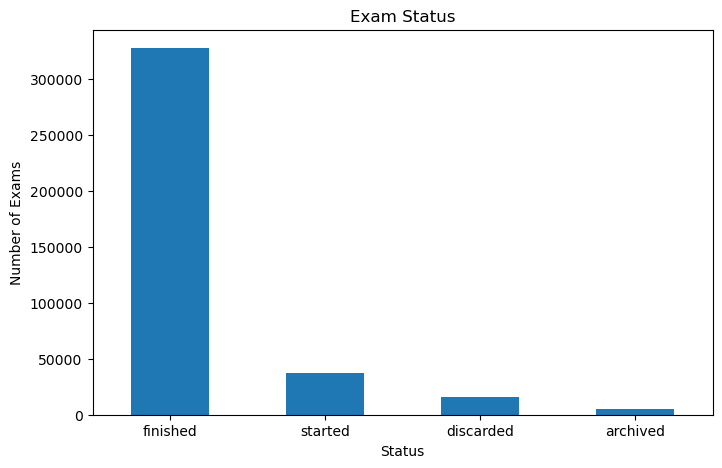

In [16]:
status_counts = df['status'].value_counts()
status_counts.drop('ready', inplace = True)

plt.figure(figsize=(8,5))
status_counts.plot(kind='bar')
plt.title('Exam Status')
plt.xlabel('Status')
plt.ylabel('Number of Exams')
plt.xticks(rotation=0)
plt.show()